In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
from sklearn.preprocessing import StandardScaler

In [2]:
data = np.array(pd.read_csv('~/DataSet3/1.csv'))

In [3]:
data1=data[:,1:4]
labels = data[:,-1]
labels

array([1., 1., 1., ..., 7., 7., 0.])

In [4]:
#scaler = StandardScaler()
#scaler.fit(data1)
#sample_transformed = scaler.transform(data1)

In [5]:
#pca = PCA(n_components=3)
#sample_transformed=pca.fit_transform(sample_transformed)
#pca.explained_variance_ratio_

In [6]:
#print(scaler.mean_)
sample_transformed=data1

In [7]:
distortion_euclidean=[]
slope=[]
K = range(1,10)
for k in K :
    kmeansModel = KMeans(n_clusters=k)
    kmeansModel.fit_predict(sample_transformed)
    #Calculate pairwise distance between centers and each sample and then finding minnimum of that
    distortion_euclidean.append(sum(np.min(cdist(sample_transformed,kmeansModel.cluster_centers_,'euclidean'),axis=1)))
    #Calculate slope of each line
    if k>1:
        s= (distortion_euclidean[-1]-distortion_euclidean[-2])
        slope.append([k,s])

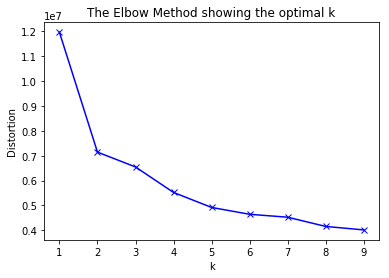

In [8]:
plt.plot(K,distortion_euclidean,'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [9]:
slope

[[2, -4816541.087667938],
 [3, -596796.4446672564],
 [4, -1024784.4063728666],
 [5, -601533.2850211291],
 [6, -275324.1060623769],
 [7, -117317.58520485181],
 [8, -370497.0894711176],
 [9, -139785.60700990353]]

In [10]:
#chose the value after which there is a reduction in gain(rather loss)
for a in range(0,7):
    change_slope=(slope[a])[-1] - (slope[a+1])[-1]
    if change_slope > 0:
        print('Optimal Number of Clusters = '+str((slope[a][0])-1))

Optimal Number of Clusters = 2
Optimal Number of Clusters = 6


In [11]:
kmeansModel_new = KMeans(n_clusters=6)
labels=kmeansModel_new.fit_predict(sample_transformed)

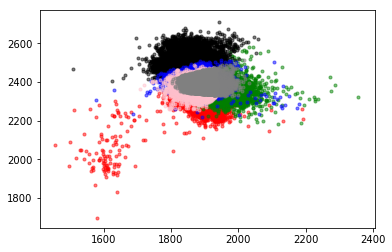

In [12]:
area = np.pi*3
plt.scatter(sample_transformed[labels==0,0],sample_transformed[labels==0,1],s=area,c='red',alpha=0.5)
plt.scatter(sample_transformed[labels==1,0],sample_transformed[labels==1,1],s=area,c='green',alpha=0.5)
plt.scatter(sample_transformed[labels==2,0],sample_transformed[labels==2,1],s=area,c='black',alpha=0.5)
plt.scatter(sample_transformed[labels==3,0],sample_transformed[labels==3,1],s=area,c='blue',alpha=0.5)
plt.scatter(sample_transformed[labels==4,0],sample_transformed[labels==4,1],s=area,c='pink',alpha=0.5)
plt.scatter(sample_transformed[labels==5,0],sample_transformed[labels==5,1],s=area,c='grey',alpha=0.5)
plt.show()

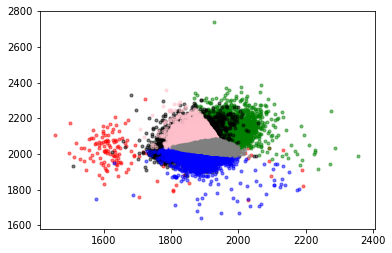

In [13]:
area = np.pi*3
plt.scatter(sample_transformed[labels==0,0],sample_transformed[labels==0,2],s=area,c='red',alpha=0.5)
plt.scatter(sample_transformed[labels==1,0],sample_transformed[labels==1,2],s=area,c='green',alpha=0.5)
plt.scatter(sample_transformed[labels==2,0],sample_transformed[labels==2,2],s=area,c='black',alpha=0.5)
plt.scatter(sample_transformed[labels==3,0],sample_transformed[labels==3,2],s=area,c='blue',alpha=0.5)
plt.scatter(sample_transformed[labels==4,0],sample_transformed[labels==4,2],s=area,c='pink',alpha=0.5)
plt.scatter(sample_transformed[labels==5,0],sample_transformed[labels==5,2],s=area,c='grey',alpha=0.5)
plt.show()

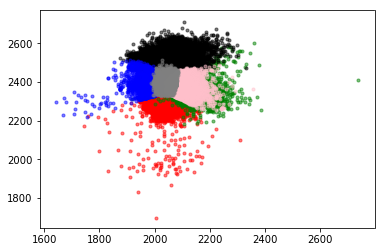

In [14]:
area = np.pi*3
plt.scatter(sample_transformed[labels==0,2],sample_transformed[labels==0,1],s=area,c='red',alpha=0.5)
plt.scatter(sample_transformed[labels==1,2],sample_transformed[labels==1,1],s=area,c='green',alpha=0.5)
plt.scatter(sample_transformed[labels==2,2],sample_transformed[labels==2,1],s=area,c='black',alpha=0.5)
plt.scatter(sample_transformed[labels==3,2],sample_transformed[labels==3,1],s=area,c='blue',alpha=0.5)
plt.scatter(sample_transformed[labels==4,2],sample_transformed[labels==4,1],s=area,c='pink',alpha=0.5)
plt.scatter(sample_transformed[labels==5,2],sample_transformed[labels==5,1],s=area,c='grey',alpha=0.5)
plt.show()

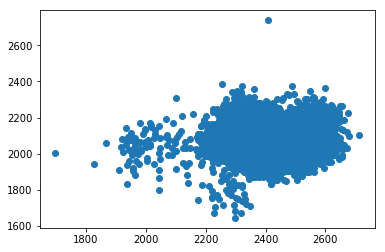

In [15]:
plt.scatter(sample_transformed[:,1],sample_transformed[:,2])